Support Vector Machine (SVM) for classification of images of cats and dogs

In [3]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import random  # Importing random module
import matplotlib.pyplot as plt
import seaborn as sns

dataset used(https://www.microsoft.com/en-us/download/details.aspx?id=54765)

In [4]:
def extract_features(folder_path, num_samples_per_category=1000, target_size=(100, 100)):
    features = []
    labels = []
    for category in ["Cat", "Dog"]:
        category_folder = os.path.join(folder_path, category)
        image_files = os.listdir(category_folder)
        # Randomly sample a subset of images
        sampled_files = random.sample(image_files, min(len(image_files), num_samples_per_category))
        for image_file in tqdm(sampled_files, desc=category):
            try:
                image = imread(os.path.join(category_folder, image_file))
                image = resize(image, target_size)
                features.append(image.flatten())
                if category == "Cat":
                    labels.append(0)  # Cat
                elif category == "Dog":
                    labels.append(1)  # Dog
            except:
                pass
    return np.array(features), np.array(labels)

In [5]:
dataset_folder = "Images"

In [6]:
num_samples_per_category = 100

In [7]:
features, labels = extract_features(dataset_folder, num_samples_per_category)

Dog: 100%|███████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 41.75it/s]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [9]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
y_pred = svm_model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.55


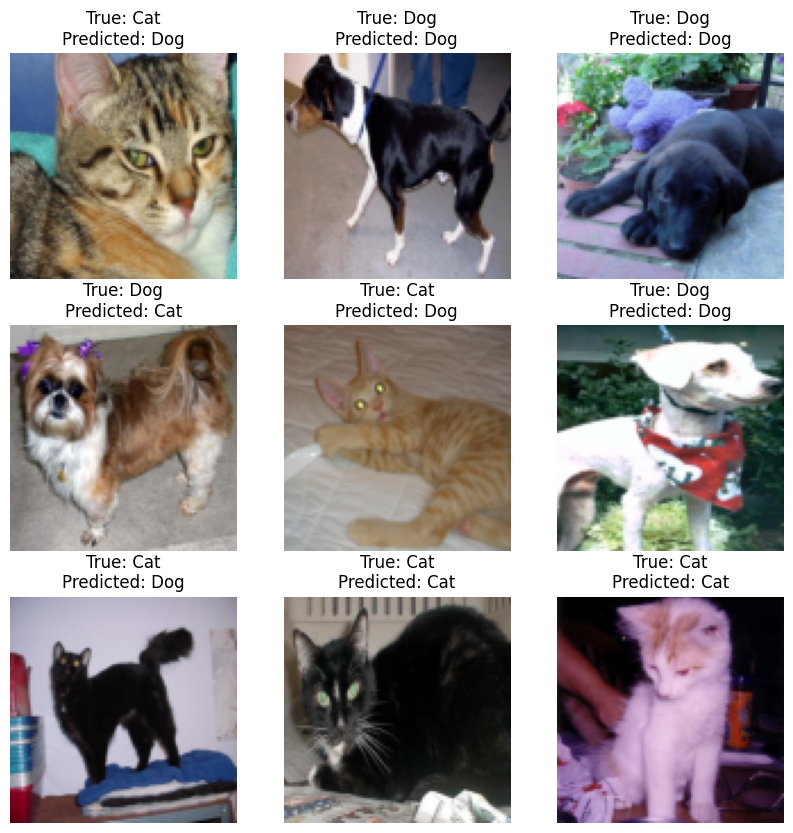

In [12]:
sample_indices = random.sample(range(len(X_test)), 9)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(100, 100, 3), cmap='gray')
    plt.title(f"True: {'Cat' if y_test[idx] == 0 else 'Dog'}\nPredicted: {'Cat' if y_pred[idx] == 0 else 'Dog'}")
    plt.axis('off')
plt.show()

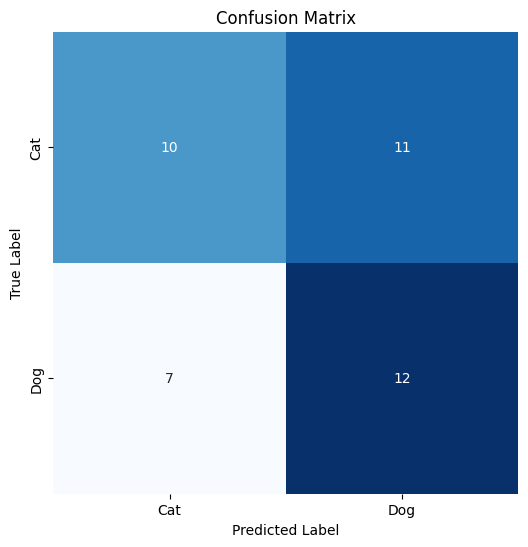

In [13]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()